In [1]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import random

In [2]:
tv = "Cleaning_up_data/clean_tv.csv"
tv_df = pd.read_csv(tv)
del tv_df['index']
tv_df

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,9.5,1,0,0,0
1,Stranger Things,2016,8.8,1,0,0,0
2,Money Heist,2017,8.4,1,0,0,0
3,Sherlock,2010,9.1,1,0,0,0
4,Better Call Saul,2015,8.7,1,0,0,0
...,...,...,...,...,...,...,...
4445,Billy Dilley's Super-Duper Subterranean Summer,2017,4.6,0,0,0,1
4446,Rocky Mountain Animal Rescue,2018,7.8,0,0,0,1
4447,Prairie Dog Manor,2019,8.6,0,0,0,1
4448,Disney Junior Music Nursery Rhymes,2017,6.6,0,0,0,1


<function matplotlib.pyplot.show(*args, **kw)>

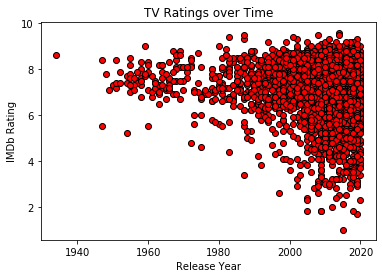

In [3]:
year = tv_df['Year']
rating = tv_df['IMDb']
plt.scatter(year, rating, facecolor = 'red', edgecolor = 'black')
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')
plt.title('TV Ratings over Time')

plt.savefig("PNG/tv_vs_time.png")
plt.show

In [6]:
sample_df = tv_df.sample(n=1000)

Text(0.5, 0, 'Release Year')

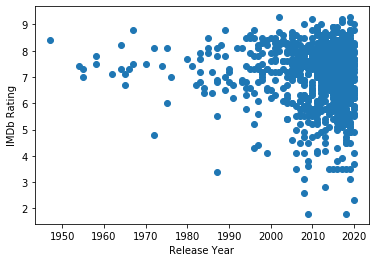

In [7]:
year = sample_df['Year']
rating = sample_df['IMDb']
plt.scatter(year, rating)
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')

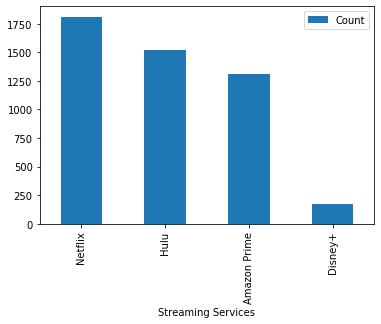

In [8]:
netflix_df = tv_df.loc[tv_df['Netflix'] == 1]
netflix = (len(netflix_df))

hulu_df = tv_df.loc[tv_df['Hulu'] == 1]
hulu = (len(hulu_df))

prime_df = tv_df.loc[tv_df['Prime Video'] == 1]
prime = (len(prime_df))

disney_df = tv_df.loc[tv_df['Disney+'] == 1]
disney = (len(disney_df))

count_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [netflix, hulu, prime, disney]}
                       ).set_index('Streaming Services')
count_df.plot(kind='bar')

<BarContainer object of 8 artists>

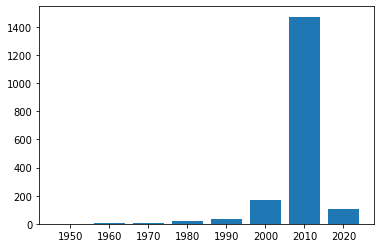

In [14]:
year_bin = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

netflix_year_df = netflix_df[['Title', 'Year']].reset_index(inplace=False)
# netflix_year_df['Year'].value_counts()
netflix_year_df['Decade'] = pd.cut(netflix_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
netflix_bar_df = netflix_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(netflix_bar_df['Decade'],netflix_bar_df['Year'])

<BarContainer object of 10 artists>

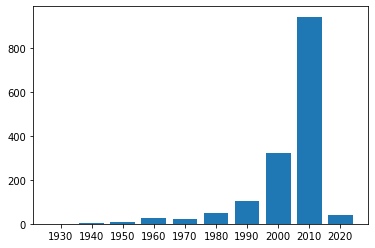

In [16]:
year_bin = [0,1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

hulu_year_df = hulu_df[['Title', 'Year']].reset_index(inplace=False)
# hulu_year_df['Year'].value_counts()
hulu_year_df['Decade'] = pd.cut(hulu_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
hulu_year_df = hulu_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(hulu_year_df['Decade'],hulu_year_df['Year'])

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

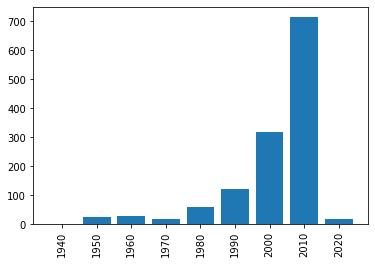

In [19]:
year_bin = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

prime_year_df = prime_df[['Title', 'Year']].reset_index(inplace=False)
#prime_year_df['Year'].value_counts()
prime_year_df['Decade'] = pd.cut(prime_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
prime_year_df = prime_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(prime_year_df['Decade'],prime_year_df['Year'])
plt.xticks(rotation=90)

<BarContainer object of 8 artists>

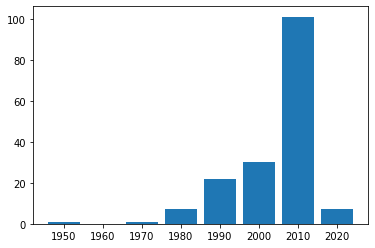

In [21]:
year_bin = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

disney_year_df = disney_df[['Title', 'Year']].reset_index(inplace=False)
#disney_year_df['Year'].value_counts()
disney_year_df['Decade'] = pd.cut(disney_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
disney_year_df = disney_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(disney_year_df['Decade'],disney_year_df['Year'])

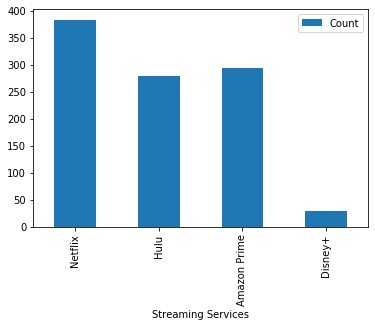

In [29]:
top_netflix = netflix_df.loc[netflix_df['IMDb']>8]
tnetflix = (len(top_netflix))

top_hulu = hulu_df.loc[hulu_df['IMDb']>8]
thulu = (len(top_hulu))

top_prime = prime_df.loc[prime_df['IMDb']>8]
tprime = (len(top_prime))

top_disney = disney_df.loc[disney_df['IMDb']>8]
tdisney = (len(top_disney))

count_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [tnetflix, thulu, tprime, tdisney]}
                       ).set_index('Streaming Services')
count_df.plot(kind='bar')